--- A ANALISAR: NVDA ---


C:\Users\elisa\AppData\Local\Temp\ipykernel_87812\2804186477.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2024-12-07", end="2025-12-07")
[*********************100%***********************]  1 of 1 completed


Retorno Anual Estimado: 40.2%
------------------------------
SHARPE RATIO:  0.73  (Penaliza a subida explosiva)
SORTINO RATIO: 0.96 (Foca-se apenas no risco de perder)


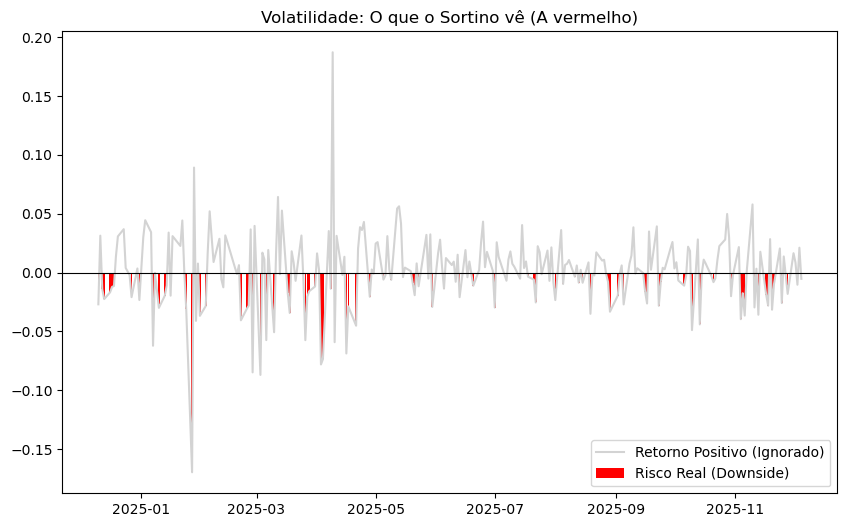

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. SETUP: Escolher o Ativo
ticker = "NVDA"  # Vamos usar Nvidia porque é muito volátil (bom para testar)
print(f"--- A ANALISAR: {ticker} ---")

# 2. DADOS: Sacar histórico (1 ano)
data = yf.download(ticker, start="2024-12-07", end="2025-12-07")
# Calcular retornos diários
data['Retorno'] = data['Close'].pct_change()
data = data.dropna() # Limpar dias vazios

# 3. ENGENHARIA DE RISCO (A Matemática)
risk_free = 0.04 # 4% taxa livre de risco

# A) Sharpe Ratio (O Standard)
# Considera TODA a volatilidade (Desvio Padrão total)
std_dev_total = data['Retorno'].std() * np.sqrt(252)
sharpe = (data['Retorno'].mean() * 252 - risk_free) / std_dev_total

# B) Sortino Ratio (O Diferenciador)
# Truque de Engenheiro: Filtrar APENAS os retornos negativos
retornos_negativos = data.loc[data['Retorno'] < 0, 'Retorno']

# Calcular o desvio padrão só desses dias maus (Downside Deviation)
downside_deviation = retornos_negativos.std() * np.sqrt(252)
sortino = (data['Retorno'].mean() * 252 - risk_free) / downside_deviation

# 4. RESULTADOS
print(f"Retorno Anual Estimado: {data['Retorno'].mean()*252*100:.1f}%")
print(f"-"*30)
print(f"SHARPE RATIO:  {sharpe:.2f}  (Penaliza a subida explosiva)")
print(f"SORTINO RATIO: {sortino:.2f} (Foca-se apenas no risco de perder)")

# 5. VISUALIZAÇÃO (Para veres o que o Sortino vê)
plt.figure(figsize=(10, 6))
plt.title(f"Volatilidade: O que o Sortino vê (A vermelho)")
plt.plot(data.index, data['Retorno'], color='lightgray', label='Retorno Positivo (Ignorado)')
plt.bar(data.index, data['Retorno'].where(data['Retorno'] < 0), color='red', label='Risco Real (Downside)')
plt.axhline(0, color='black', linewidth=0.8)
plt.legend()
plt.show()